## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

D:\Tools\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
D:\Tools\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

# build mlp with batch normalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
## hyper params setting
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE_LIST = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [9]:
results = {}

for BATCH_SIZE in BATCH_SIZE_LIST:
    print(f'Experiment with BATCH_SIZE: {BATCH_SIZE}')
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = f'BATCH_SIZE_{BATCH_SIZE}'
    
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with BATCH_SIZE: 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)      

50000/50000 [==============================] - 321s 6ms/step - loss: 2.2575 - acc: 0.1467 - val_loss: 3.1517 - val_acc: 0.1468
Epoch 49/50
50000/50000 [==============================] - 321s 6ms/step - loss: 2.2522 - acc: 0.1525 - val_loss: 3.5442 - val_acc: 0.1485
Epoch 50/50
50000/50000 [==============================] - 321s 6ms/step - loss: 2.2564 - acc: 0.1511 - val_loss: 3.2960 - val_acc: 0.1639
Experiment with BATCH_SIZE: 16
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 

50000/50000 [==============================] - 50s 1000us/step - loss: 1.1132 - acc: 0.6063 - val_loss: 1.3283 - val_acc: 0.5377
Epoch 47/50
50000/50000 [==============================] - 46s 916us/step - loss: 1.1112 - acc: 0.6072 - val_loss: 1.3362 - val_acc: 0.5361
Epoch 48/50
50000/50000 [==============================] - 44s 880us/step - loss: 1.1034 - acc: 0.6076 - val_loss: 1.3333 - val_acc: 0.5324
Epoch 49/50
50000/50000 [==============================] - 44s 880us/step - loss: 1.1042 - acc: 0.6080 - val_loss: 1.3362 - val_acc: 0.5363
Epoch 50/50
50000/50000 [==============================] - 44s 873us/step - loss: 1.0911 - acc: 0.6131 - val_loss: 1.2990 - val_acc: 0.5524
Experiment with BATCH_SIZE: 32
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (D

50000/50000 [==============================] - 26s 514us/step - loss: 0.8678 - acc: 0.6916 - val_loss: 1.5401 - val_acc: 0.5073
Epoch 44/50
50000/50000 [==============================] - 25s 507us/step - loss: 0.8486 - acc: 0.6978 - val_loss: 1.5012 - val_acc: 0.5159
Epoch 45/50
50000/50000 [==============================] - 26s 527us/step - loss: 0.8438 - acc: 0.6989 - val_loss: 1.5927 - val_acc: 0.4962
Epoch 46/50
50000/50000 [==============================] - 29s 573us/step - loss: 0.8361 - acc: 0.6994 - val_loss: 1.5543 - val_acc: 0.5062
Epoch 47/50
50000/50000 [==============================] - 27s 542us/step - loss: 0.8254 - acc: 0.7051 - val_loss: 1.5938 - val_acc: 0.4957
Epoch 48/50
50000/50000 [==============================] - 25s 506us/step - loss: 0.8244 - acc: 0.7072 - val_loss: 1.5537 - val_acc: 0.5125
Epoch 49/50
50000/50000 [==============================] - 26s 516us/step - loss: 0.8122 - acc: 0.7096 - val_loss: 1.5720 - val_acc: 0.5013
Epoch 50/50
50000/50000 [=======

50000/50000 [==============================] - 12s 244us/step - loss: 0.3907 - acc: 0.8649 - val_loss: 2.1579 - val_acc: 0.4674
Epoch 41/50
50000/50000 [==============================] - 12s 242us/step - loss: 0.3740 - acc: 0.8701 - val_loss: 2.2109 - val_acc: 0.4684
Epoch 42/50
50000/50000 [==============================] - 12s 250us/step - loss: 0.3655 - acc: 0.8732 - val_loss: 2.2488 - val_acc: 0.4506
Epoch 43/50
50000/50000 [==============================] - 12s 243us/step - loss: 0.3490 - acc: 0.8799 - val_loss: 2.4993 - val_acc: 0.4497
Epoch 44/50
50000/50000 [==============================] - 12s 243us/step - loss: 0.3360 - acc: 0.8851 - val_loss: 2.5784 - val_acc: 0.4555
Epoch 45/50
50000/50000 [==============================] - 13s 253us/step - loss: 0.3282 - acc: 0.8856 - val_loss: 2.8038 - val_acc: 0.4117
Epoch 46/50
50000/50000 [==============================] - 14s 275us/step - loss: 0.3053 - acc: 0.8970 - val_loss: 2.4181 - val_acc: 0.4619
Epoch 47/50
50000/50000 [=======

50000/50000 [==============================] - 10s 197us/step - loss: 0.3302 - acc: 0.8984 - val_loss: 2.0913 - val_acc: 0.4695
Epoch 39/50
50000/50000 [==============================] - 10s 196us/step - loss: 0.3199 - acc: 0.9024 - val_loss: 2.0593 - val_acc: 0.47163 - ETA: 1s - loss: 0.3167 - acc: 0. - ETA: 0s - loss: 0.3176 - acc:  - ETA: 0s - loss: 0.3191 - acc: 0.902 - ETA: 0s - loss: 0.3196 - acc: 0.902
Epoch 40/50
50000/50000 [==============================] - 10s 196us/step - loss: 0.2958 - acc: 0.9105 - val_loss: 2.2267 - val_acc: 0.4554
Epoch 41/50
50000/50000 [==============================] - 10s 196us/step - loss: 0.2767 - acc: 0.9178 - val_loss: 2.1743 - val_acc: 0.4740
Epoch 42/50
50000/50000 [==============================] - 10s 197us/step - loss: 0.2645 - acc: 0.9220 - val_loss: 2.3658 - val_acc: 0.4580
Epoch 43/50
50000/50000 [==============================] - 10s 204us/step - loss: 0.2604 - acc: 0.9222 - val_loss: 2.3005 - val_acc: 0.4678
Epoch 44/50
50000/50000 [==

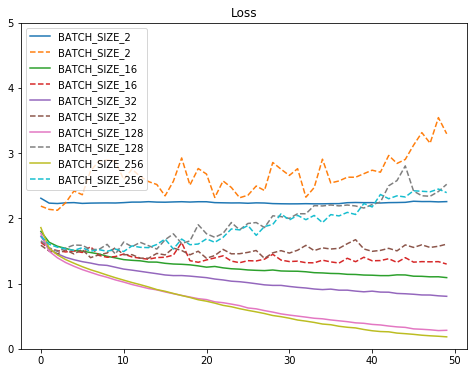

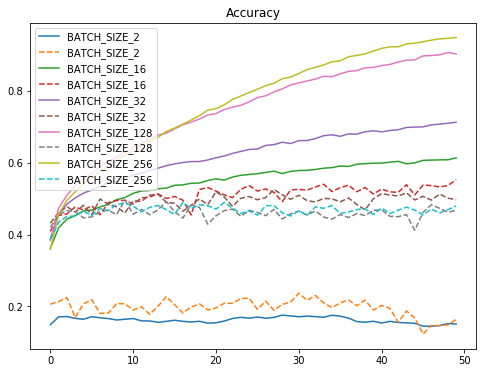

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond)
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond)
plt.title("Accuracy")
plt.legend()
plt.show()